# Final Project: Customer Purchase Prediction

**Project Goal:** To build a Machine Learning model that predicts **Customer Purchase Intent.**

**Dataset:** `consumer_electronics_sales_data.csv`

**Target Variable:** `PurchaseIntent` (0 = No, 1 = Yes)

**Features:** Age, Product Price, Customer Satisfaction, Purchase Frequency.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/consumer_electronics_sales_data.csv")

print("--- Dataset Info ---")
print(df.info())
print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Target Distribution (0=No, 1=Yes) ---")
print(df['PurchaseIntent'].value_counts())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB
None

--- First 5 Rows ---
   ProductID ProductCategory  ProductBrand  ProductPrice  CustomerAge  \
0       5874     Smartphones  Other Brands    312.949668           18   
1       5875   Smart Watches       Samsung    980.389404           35   
2 

In [5]:
from sklearn.model_selection import train_test_split

features = ['CustomerAge', 'ProductPrice', 'PurchaseFrequency', 'CustomerSatisfaction']
target = 'PurchaseIntent'

X = df[features]  # The questions (Inputs)
y = df[target]    # The answer (Output)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:",X_train.shape)
print("Testing Data Shape:",X_test.shape)

Training Data Shape: (7200, 4)
Testing Data Shape: (1800, 4)


In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

print("Training the model...")
model.fit(X_train, y_train)
print("Model trained successfully!")

Training the model...
Model trained successfully!


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
# 1. Make Predictions on the Test Data
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print("\n--- Sample Predictions ---")
print(comparison.head(10))

Model Accuracy: 70.78%

--- Sample Predictions ---
      Actual  Predicted
7940       1          0
1162       1          1
582        1          1
4081       0          0
8412       0          0
8730       0          1
5936       1          1
8283       1          1
3706       1          1
4071       0          0


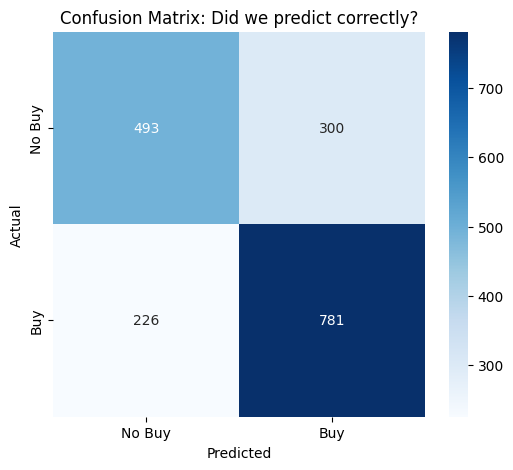

In [9]:
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Buy', 'Buy'],
            yticklabels=['No Buy', 'Buy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Did we predict correctly?')
plt.show()